## Multiple Linear Regression using Stochastic Gradient Descent

In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
x = train_data[['a', 'b']].values
y = train_data['y'].values
x_test = test_data[['a', 'b']].values
y_test = test_data['y'].values

In [83]:
# Hypothesis structure(Linear Representation) y = theta0 + (theta1*x)
def hypothesis(theta_coeff, x):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    
    Returns:
    Predicted value for each example-row in inputs (1 x num_of_inputs)
    """
    return x.dot(theta_coeff)

In [84]:
def cost_function_mse(theta_coeff, x, y):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    
    Returns:
    Computes cost of using theta_coeff as coefficients for Linear Representation wrt to training data
    """
    predicted_y = hypothesis(theta_coeff, x)
    return np.sum((predicted_y - y)**2) / (2*x.shape[0])

In [85]:
def compute_gradient(theta_coeff, x, y):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    
    Returns:
    Array of computed gradients for each of the coefficients (1 x num_of_coefficients)
    """
    predicted_y = hypothesis(theta_coeff, x)
    # coeff_gradients = np.sum(((predicted_y - y)**2) * x.T, axis=1) / (x.shape[0])
    coeff_gradients = np.sum((predicted_y - y) * x.T, axis=1) / (x.shape[0])
    return coeff_gradients

In [86]:
def stochastic_gradient_descent(x, y, iterations, learning_rate, avg_cost_batch_size):
    """
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    iterations(int): number of iterations/epochs
    learning_rate(int): alpha or learning rate which controls the descent
    
    Returns:
    theta_coeff(array): Best set of coefficients for the linear model (1 x num_of_coefficients)
    cost_history(array): Cost history wrt to coefficients computed while performing the descent
    """
    # Container to cost history as the descent progresses
    cost_history = []
    
    # Initialize coefficients with random values
    theta_coeff = np.array([0] * x.shape[1])
    
    # Shuffle the training examples
    # Shuffling ensure that each data point creates an "independent" change on the model, without being biased by the same points before them
    # "Shuffling mini-batches makes the gradients more variable, which can help convergence because it increases the likelihood of hitting a good direction"
    shuffled_indices = np.arange(x.shape[0])
    np.random.shuffle(shuffled_indices)
    x = x[shuffled_indices]
    y = y[shuffled_indices]
    
    for iteration in range(iterations):
        batch_cost_container = []
        for training_example_idx, (training_example_x, training_example_y) in enumerate(zip(x,y)):
            # Predict -> compute cost -> compute gradient ... wrt to each example
            example_x = training_example_x.reshape([-1, x.shape[1]])
            coeff_gradients = compute_gradient(theta_coeff, example_x, training_example_y)
            # Alter old theta_coeff using movement suggested by new coeff_gradients
            theta_coeff = theta_coeff - (learning_rate * coeff_gradients)
            # Compute the cost of using theta_coeff as coefficients of linear function
            cost = cost_function_mse(theta_coeff, x, y)
            batch_cost_container.append(cost)
            # Append the cost to cost_history by averaging the accumulated costs in batch_cost_container
            if len(batch_cost_container) % avg_cost_batch_size == 0:
                cost_history.append(np.mean(batch_cost_container))
                batch_cost_container = []
    return theta_coeff, cost_history 

In [87]:
## Prepare data
# Learning rate
alpha = 0.0001
# Bias variable 
bias_variable = np.ones(len(x))
# Plug input along with bias_variable
x_train = np.column_stack([bias_variable, x])

In [88]:
best_theta_coeff, cost_history = stochastic_gradient_descent(x_train, y, 150, alpha, 10)

In [89]:
cost_history[-1]

217.235264823553

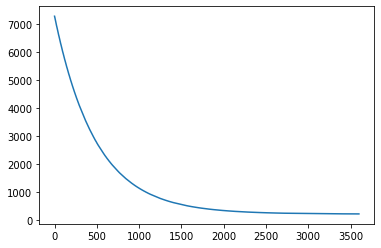

In [90]:
plt.plot(cost_history)

#### Model Evaluation

In [91]:
def get_predictions(theta_coeff, x_input):
    # Bias variable 
    bias_variable = np.ones(len(x_input))
    # Plug input along with bias_variable
    new_x_input = np.column_stack([bias_variable, x_input])
    # Compute output values with new coefficients
    preds = hypothesis(theta_coeff, new_x_input)
    return preds

In [92]:
# RMSE
def rmse(y, y_pred):
    rmse = np.sqrt(np.sum((y - y_pred)**2) / len(y))
    return rmse

In [93]:
# R2 Score
# How much(%) of the total variation in y is explained by variation in x(fitted line)
def r2_score(y, y_pred):  
    mean_y = np.mean(y)
    SE_total_variation = np.sum((y - mean_y)**2) # Unexplained max possible variation in y wrt->Mean
    SE_line_variation = np.sum((y - y_pred)**2) # Unexplained variation in y wrt -> fitted line
    r2 = 1 - (SE_line_variation / SE_total_variation) # Expalined = 1 - Unexplained
    return r2

Training set evaluation

In [94]:
y_pred_train = get_predictions(best_theta_coeff, x)

In [95]:
print(f"RMSE = {rmse(y, y_pred_train)}")
print(f"R2_score = {r2_score(y, y_pred_train)}")

RMSE = 20.844132008437157
R2_score = 0.9696194625318099


Testing set evaluation

In [96]:
y_pred_test = get_predictions(best_theta_coeff, x_test)

In [97]:
print(f"RMSE = {rmse(test_data['y'].values, y_pred_test)}")
print(f"R2_score = {r2_score(test_data['y'].values, y_pred_test)}")

RMSE = 18.833820742072493
R2_score = 0.9737485754602653
